<a href="https://colab.research.google.com/github/rootofdata/Outlier_Detection/blob/main/difference%20%26FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised outlier detection for Time series data using LSTM + AE
Feature : TMP,HMD,CO,H2S,NO2,TVOC,CO2,NH3,PM10 (9 features)   
Time : 2022-3-23 ~

### Difference

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

In [ ]:
def adf_test(timeseries, pvalue = .05, regression_option = 'ct'):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', regression = regression_option)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dfoutput[1] < pvalue:
       print(f"정상시계열이 아니라는 귀무가설을 {pvalue*100}%의 유의수준으로 기각할 수 있으므로 해당 데이터는 정상성이 보장됩니다.")
    else:
       print(f"정상시계열이 아니라는 귀무가설을 {pvalue*100}%의 유의수준으로 기각할 수 없으므로 해당 데이터는 정상성을 보장하지 못합니다.")

In [ ]:
def adf_test1(timeseries, pvalue = .05, regression_option = 'ct'):
    dftest = adfuller(timeseries, autolag='AIC', regression = regression_option)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    if dfoutput[1] < pvalue:
       print(timeseries.name,f"정상성이 보장됩니다.")
    else:
       print(timeseries.name,f"정상성을 보장하지 못합니다.")

In [ ]:
adf_test(d11['PM10'])

Results of Dickey-Fuller Test:
Test Statistic                    -5.708918
p-value                            0.000009
Lags Used                         43.000000
Number of Observations Used    17046.000000
Critical Value (1%)               -3.959301
Critical Value (5%)               -3.410748
Critical Value (10%)              -3.127202
dtype: float64
정상시계열이 아니라는 귀무가설을 5.0%의 유의수준으로 기각할 수 있으므로 해당 데이터는 정상성이 보장됩니다.


https://signature95.tistory.com/22 참고

In [ ]:
for i in range(7):
  adf_test1(d11.iloc[:,1+i])

Temperature 정상성이 보장됩니다.
Humidity 정상성이 보장됩니다.
TVOC 정상성이 보장됩니다.
CO 정상성이 보장됩니다.
CO2 정상성이 보장됩니다.
CH2O 정상성이 보장됩니다.
PM10 정상성이 보장됩니다.


device11로 하였을 경우, CO,NO2,H2S,NH3를 제외한 모든 부분에서 정상성을 만족한다.

In [ ]:
diff_data=d11_1.copy()

In [ ]:
# 전체 1차 차분
for i in range(7):
  diff_data.iloc[:,1+i]=diff_data.iloc[:,1+i].replace(diff_data.iloc[:,1+i].diff().dropna())

In [ ]:
for i in range(7):
  adf_test1(diff_data.iloc[:,1+i])

Temperature 정상성이 보장됩니다.
Humidity 정상성이 보장됩니다.
TVOC 정상성이 보장됩니다.
CO 정상성이 보장됩니다.
CO2 정상성이 보장됩니다.
CH2O 정상성이 보장됩니다.
PM10 정상성이 보장됩니다.


In [ ]:
diff_data

,TsYMD,Temperature,Humidity,TVOC,CO,CO2,CH2O,PM10
0,2022-05-01 00:02,23.27,21.45,12.0,0.99,0.0,0.0,-1.0
1,2022-05-01 00:04,20.51,21.46,12.0,0.82,0.0,0.0,0.0
2,2022-05-01 00:06,21.87,21.46,3.0,0.50,2.0,0.0,-1.0
3,2022-05-01 00:08,21.87,21.48,15.0,0.52,-2.0,0.0,-1.0
4,2022-05-01 00:10,21.86,21.48,-2.0,0.37,1.0,0.0,-1.0
...,...,...,...,...,...,...,...,...
12732,2022-05-18 16:14,29.12,21.57,-9.0,0.67,4.0,0.0,1.0
12733,2022-05-18 16:16,27.74,21.57,-90.0,0.71,1.0,0.0,0.0
12734,2022-05-18 16:18,27.74,21.55,5.0,0.76,-3.0,0.0,1.0
12735,2022-05-18 16:20,27.71,21.61,50.0,0.68,1.0,0.0,1.0


In [ ]:
def diff1(timeseries, pvalue = .05, regression_option = 'ct'):
    dftest = adfuller(timeseries, autolag='AIC', regression = regression_option)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    if dfoutput[1] < pvalue:
       timeseries=timeseries
    else:
       timeseries=timeseries.replace(timeseries.diff(1).dropna())
       
def diff2(timeseries, pvalue = .05, regression_option = 'ct'):
    dftest = adfuller(timeseries, autolag='AIC', regression = regression_option)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    if dfoutput[1] < pvalue:
       timeseries=timeseries
    else:
       timeseries=timeseries.replace(timeseries.diff().diff().dropna())

In [ ]:
for i in range(14):
  diff1(diff_data.iloc[:,3+i])
  diff2(diff_data.iloc[:,3+i])

IndexError: ignored

In [ ]:
for i in range(14):
  adf_test1(diff_data.iloc[:,3+i])

왜 이렇게 나와 시x  
device11로 하면 정상성 잘 만족하는데, 쪼개서 하면 좀 정상성 만족을 못하는데 ? 당연히 기간이 짧아서 그런가

In [ ]:
diff=device11.copy()
for i in range(14):
  diff1(diff.iloc[:,3+i])

In [ ]:
for i in range(14):
  diff2(diff.iloc[:,3+i])

In [ ]:
for i in range(14):
  adf_test1(diff.iloc[:,3+i])

CO ,NO2, H2S,NH3 여기서 CO만 필요한데 흐으으으음

In [ ]:
plt.figure(figsize=(8,3)) 
plt.plot(d11_1['PM2.5'].values, alpha=.7) 
plt.hlines(y=d11_1['PM2.5'].mean(), xmin=-50, xmax=1500, colors='red', linestyles='dashed') 
plt.show()

In [ ]:
plt.figure(figsize=(8,3)) 
plt.plot(diff_data1.values, alpha=.7) 
plt.hlines(y=diff_data1.mean(), xmin=-50, xmax=1500, colors='red', linestyles='dashed') 
plt.show()

정상성 만족 못하면?-> 로그 이후 1차 차분  
또 만족 못하면? -> 1차 차분 값에 또 차분 (2차 차분)

안되면 FFT 시행..?

### FFT(Fast Fourier Transform)

FFT를 하는 주된 이유는 시간대역 데이터의 주파수 특성을 파악하여 분석&활용 위함  
-> 음... 하는게 맞는지 나(서영석)은 잘 모르겠음 / 이게 주파수에서 쓰는 걸로 계속 나와서.. 하는게 맞다면 좋겠음

In [ ]:
from scipy.fftpack import fft 
import scipy.fft

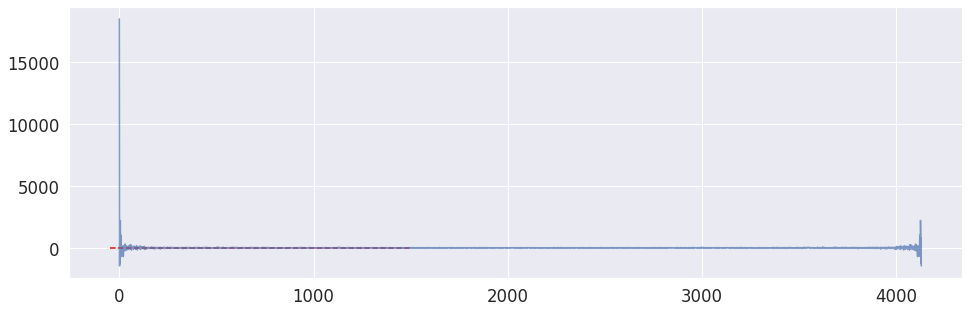

In [ ]:
y=np.fft.fft(d11_1['PM2.5'])
plt.figure(figsize=(16,5)) 
plt.plot(y, alpha=.7) 
plt.hlines(y.mean(), xmin=-50, xmax=1500, colors='red', linestyles='dashed') 
plt.show()